In [220]:
### Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from  sklearn.model_selection import train_test_split , StratifiedKFold

import warnings 
warnings.simplefilter('ignore')

In [221]:
## Read Data files 
train = pd.read_csv('D:\\Ashish\\Projects\\Hackethon Problems\\Black Friday\\train.csv')
test = pd.read_csv('D:\\Ashish\\Projects\\Hackethon Problems\\Black Friday\\test.csv')
submission = pd.read_csv('D:\\Ashish\\Projects\\Hackethon Problems\\Black Friday\\sample_submission_V9Inaty.csv')

In [222]:
#### Get Basic Details of the data files
print('Train data Shape : ' , train.shape)
print('Test data Shape : ' , test.shape)
print('Submission data Shape : ' , submission.shape)

print('#########################################')
print('Null Data Details - Train data')
print(train.isnull().sum())

print('#########################################')
print('Null Data Details - Test data')
print(test.isnull().sum())

Train data Shape :  (550068, 12)
Test data Shape :  (233599, 11)
Submission data Shape :  (233599, 3)
#########################################
Null Data Details - Train data
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
#########################################
Null Data Details - Test data
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0


#### Observation -- >
Both train and test data has null values in Product_Category_2 & Product_Category_3. These features needs to be fixed

In [223]:
print('Train Data Set -- >')
print(train.info())
print('######################################')
print('Test Dataset ====> ')
print(test.info())

Train Data Set -- >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.

In [224]:
### Find Numerical and Categorical features
numerical = [features for features in train.columns if train[features].dtypes != 'O'] 

categorical = [features for features in train.columns if train[features].dtypes == 'O']

print('Numerical Features are : ')
print(numerical)
print('Categorical Features are : ')
print(categorical)

Numerical Features are : 
['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
Categorical Features are : 
['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [225]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Observations 
1. Age is categorical . It has different values like range , + , etc.
2. Stay_In_Current_City_Years is categorical . It has different values like range , + , etc.
3. Product_ID is ID columns. It is also mixed variable (numerical+Str) . This can be used to generate new feature.
4. Occupation is numerical . This is generally categorical feature . 

##### DATA ANALYSIS

#### Numerical features

In [226]:
numerical.remove('Purchase')
numerical

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [227]:
## Lets inspect values of variable 
for i in numerical :
    print(i)
    print(train[i].dropna().unique())
    print('######################')

User_ID
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
######################
Occupation
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
######################
Marital_Status
[0 1]
######################
Product_Category_1
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
######################
Product_Category_2
[ 6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
######################
Product_Category_3
[14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
######################


#### Observation 
1. User_Id is has duplicate records . One user has multiple purchases.
2. All features have descrete data . No contineous features.

In [228]:
print(train[numerical].describe())

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3  
count       376430.000000       166821.000000  
mean             9.842329           12.668243  
std              5.086590            4.125338  
min              2.000000            3.000000  
25%              5.000000            9.000000  
50%              9.000000           14.000000

In [229]:
### Visualize the numerical data 
def NumHist(df,feature):
    plt.hist(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count of" + feature)
    plt.title(feature)
    plt.show()

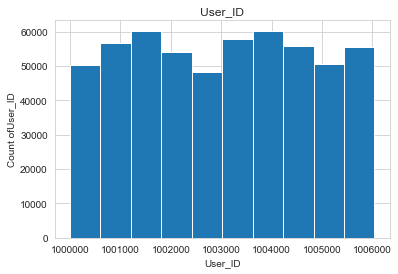

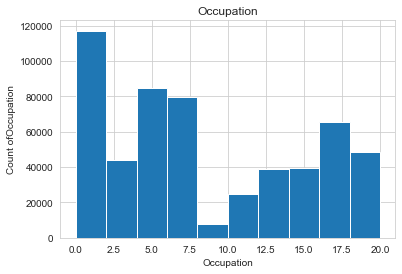

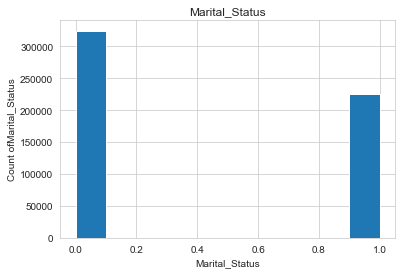

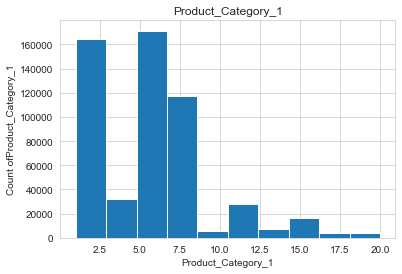

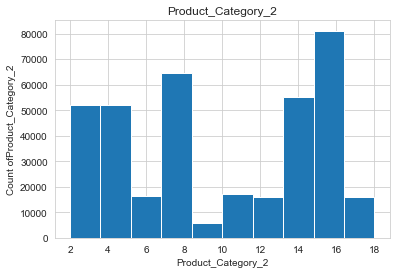

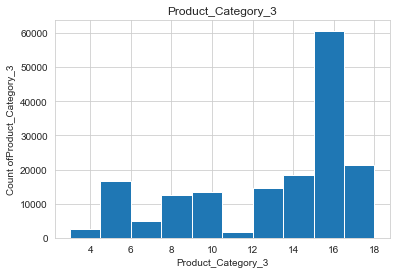

In [230]:
for i in numerical:
    NumHist(train,i)

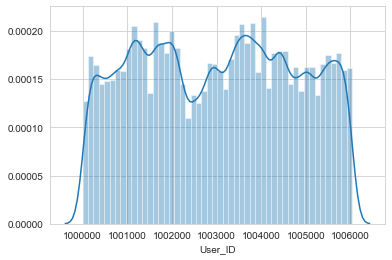

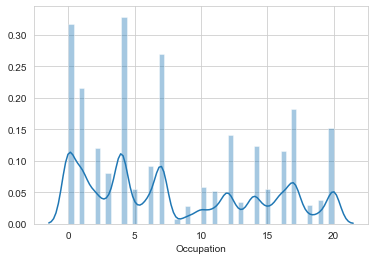

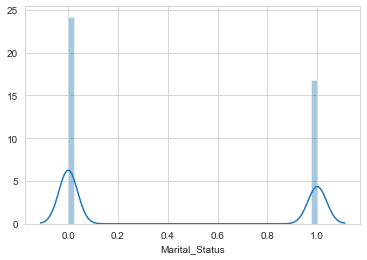

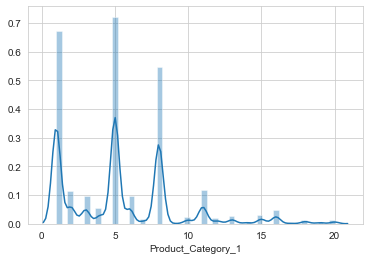

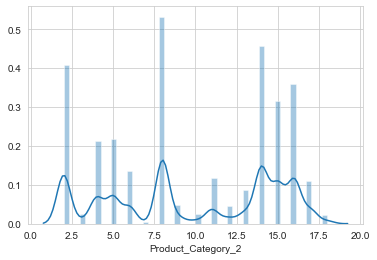

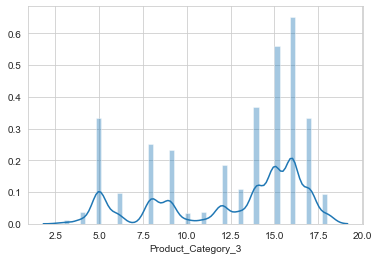

In [231]:
for i in numerical :
    sns.distplot(train[i])
    plt.show()

In [232]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [233]:
train['Product_ID'].str[7:].value_counts()

42    536415
2       9500
44       899
45       837
53       818
36       814
93       785
Name: Product_ID, dtype: int64

In [234]:
train['Product_ID'].str[6:].value_counts()

442    59479
942    59066
742    54377
042    53534
842    53225
642    51907
142    51888
542    51853
242    51116
342    49970
42      9500
644      899
445      837
853      818
436      814
293      785
Name: Product_ID, dtype: int64

In [235]:
train['Product_ID'].str[3:5].value_counts().sort_index(level=1)

00    17542
01    12390
02    14364
03    16833
04    14014
05    20253
06     6240
07    10468
08    17538
09     2772
10    18101
11    43632
12    23334
13     9527
14    15224
15    15890
16     7755
17    16992
18    17918
19    17653
20     9327
21    16011
22    16605
23    11128
24    16155
25    17149
26    10817
27    17271
28    15354
29    11293
30    11188
31    11221
32    13547
33    11535
34    11178
35    10929
36     6495
37     5123
93       81
94     1050
95     1549
96     2077
97     2456
98      786
99     1303
Name: Product_ID, dtype: int64

In [236]:
test['Product_ID'].str[3:5].value_counts().sort_index(level=1)

00     7551
01     5482
02     6058
03     7236
04     6024
05     8537
06     2608
07     4402
08     7517
09     1129
10     7685
11    18884
12     9928
13     4072
14     6577
15     6889
16     3219
17     7307
18     7619
19     7401
20     4047
21     6980
22     7191
23     4810
24     6793
25     7424
26     4624
27     7255
28     6547
29     4835
30     4782
31     4800
32     5871
33     4889
34     4768
35     4583
36     2810
37      446
93       40
94      427
95      728
96      902
97     1050
98      340
99      532
Name: Product_ID, dtype: int64

#### Observation 
Product ID has 99 different values 

In [237]:
train['Product_Id_Reduced'] = train['Product_ID'].str[3:5]
test['Product_Id_Reduced'] = test['Product_ID'].str[3:5]

In [238]:
train[train.Product_Category_2.isnull()].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Id_Reduced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,06
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,08
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,28
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871,27
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957,01


In [239]:
train.Product_Category_1.value_counts().sort_index()

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category_1, dtype: int64

In [240]:
train.Product_Category_3.value_counts(dropna=False).sort_index()

3.0        613
4.0       1875
5.0      16658
6.0       4890
8.0      12562
9.0      11579
10.0      1726
11.0      1805
12.0      9246
13.0      5459
14.0     18428
15.0     28013
16.0     32636
17.0     16702
18.0      4629
NaN     383247
Name: Product_Category_3, dtype: int64

#### Observation --
For all Product_Category_2 Null records , Product_Category_3 is also null 
But these features denotes if product is also part of any other category.

In [241]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Id_Reduced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,06
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,24
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,08
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,08
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,28


In [242]:
numerical

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [243]:
train.Occupation.value_counts().sort_index()

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

In [244]:
categorical

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [245]:
train['Gender'] = train['Gender'].replace({'F': 0 , 'M' : 1 }) 
test['Gender'] = test['Gender'].replace({'F': 0 , 'M' : 1 }) 


In [246]:
test.Age.value_counts().sort_index()

0-17      6232
18-25    42293
26-35    93428
36-45    46711
46-50    19577
51-55    16283
55+       9075
Name: Age, dtype: int64

In [247]:
train['Age'] = train['Age'].replace({'0-17': 0 , '18-25' : 1  , '26-35' : 2 , '36-45' : 3 , '46-50' : 4 , '51-55' : 5 , '55+' : 6}) 
test['Age'] = test['Age'].replace({'0-17': 0 , '18-25' : 1  , '26-35' : 2 , '36-45' : 3 , '46-50' : 4 , '51-55' : 5 , '55+' : 6}) 

In [248]:
train['City_Category'] = train['City_Category'].replace({'A': 2 , 'B' : 1 , 'C' : 0 }) 
test['City_Category'] = test['City_Category'].replace({'A': 2 , 'B' : 1 , 'C': 0 })

In [249]:
train.Stay_In_Current_City_Years.value_counts().sort_index()

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

In [250]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace({'0': 0 , '1' : 1 , '2' : 2 , '3': 3 , '4+':4 }) 
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].replace({'0': 0 , '1' : 1 , '2' : 2 , '3': 3 , '4+':4 }) 

In [251]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Id_Reduced
0,1000001,P00069042,0,0,10,2,2,0,3,NaN,NaN,8370,06
1,1000001,P00248942,0,0,10,2,2,0,1,6.0,14.0,15200,24
2,1000001,P00087842,0,0,10,2,2,0,12,NaN,NaN,1422,08
3,1000001,P00085442,0,0,10,2,2,0,12,14.0,NaN,1057,08
4,1000002,P00285442,1,6,16,0,4,0,8,NaN,NaN,7969,28


In [252]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Id_Reduced
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,NaN,12
1,1000009,P00113442,1,2,17,0,0,0,3,5.0,NaN,11
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,NaN,28
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,NaN,14
4,1000011,P00053842,0,2,1,0,1,0,4,5.0,12.0,05


In [253]:
train['Product_Category_2'] = train['Product_Category_2'].fillna(0)

In [254]:
train['Product_Category_3'] = train['Product_Category_3'].fillna(0)

In [255]:
test['Product_Category_2'] = test['Product_Category_2'].fillna(0)
test['Product_Category_3'] = test['Product_Category_3'].fillna(0)

In [256]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Id_Reduced
0,1000001,P00069042,0,0,10,2,2,0,3,0.0,0.0,8370,06
1,1000001,P00248942,0,0,10,2,2,0,1,6.0,14.0,15200,24
2,1000001,P00087842,0,0,10,2,2,0,12,0.0,0.0,1422,08
3,1000001,P00085442,0,0,10,2,2,0,12,14.0,0.0,1057,08
4,1000002,P00285442,1,6,16,0,4,0,8,0.0,0.0,7969,28


In [257]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Id_Reduced
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,0.0,12
1,1000009,P00113442,1,2,17,0,0,0,3,5.0,0.0,11
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,0.0,28
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,0.0,14
4,1000011,P00053842,0,2,1,0,1,0,4,5.0,12.0,05


In [258]:
### Define target and ID column
target = 'Purchase'
Id_Cols = ['User_ID' , 'Product_ID']

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def ModelFit(algo , dtrain , dtest , predictors , target , Id_Cols , filename):
    ## Fit algorithm on data
    algo.fit(dtrain[predictors] , dtrain[target])
    
    ## Predict training set
    dtrain_predictions = algo.predict(dtrain[predictors])
    
    ## Perform cross validations
    
    cv_score = cross_val_score(algo , dtrain[predictors] , dtrain[target] , cv = 20 )
    cv_score = np.sqrt(np.abs(cv_score))
    
    
    ## Print Model Report
    
    print('\n Model Report')
    print('RMSE : %.4g' % np.sqrt(mean_squared_error(dtrain[target].values , dtrain_predictions)))
    print('CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(cv_score) , np.std(cv_score) , np.min(cv_score), 
                                                                            np.max(cv_score)) )
    
    ## Predict on test data
    dtest[target] = algo.predict(dtest[predictors])
    
    ## Export Submission
    Id_Cols.append(target)
    submission = pd.DataFrame({ x : dtest[x] for x in Id_Cols})
    
    submission.to_csv(filename , index = False)
    
    


 Model Report
RMSE : 4614
CV Score : Mean - 0.3829 | Std - 0.0508 | Min - 0.3569 | Max - 0.6019


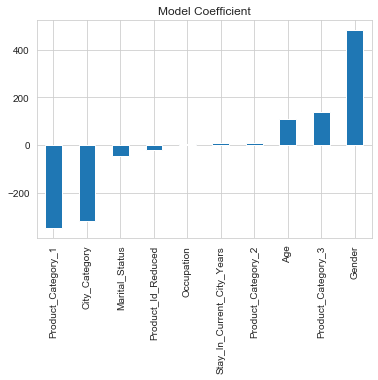

In [259]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_squared_error

filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\Black Friday\\Algo1.csv'
predictors = [x for x in train.columns if x not in [target]+Id_Cols]
predictors
#print prediction

algo = LinearRegression(normalize=True)

ModelFit(algo , train , test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.coef_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()


 Model Report
RMSE : 4615
CV Score : Mean - 0.3829 | Std - 0.04934 | Min - 0.358 | Max - 0.5958


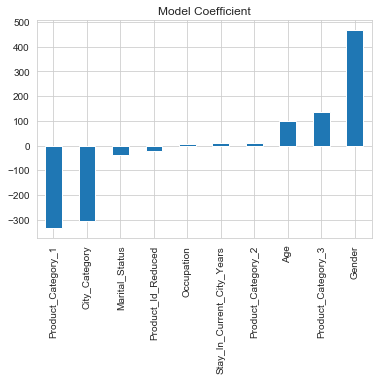

In [260]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_squared_error

filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\Black Friday\\Algo2.csv'
predictors = [x for x in train.columns if x not in [target]+Id_Cols]

algo = Ridge(alpha=0.05, normalize=True)

ModelFit(algo , train , test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.coef_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()


 Model Report
RMSE : 2729
CV Score : Mean - 0.8325 | Std - 0.009683 | Min - 0.8263 | Max - 0.8735


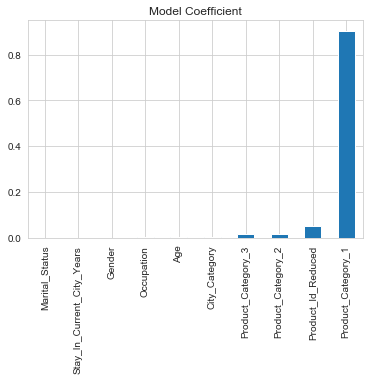

In [261]:
from sklearn.tree import DecisionTreeRegressor

filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\Black Friday\\Algo3.csv'
predictors = [x for x in train.columns if x not in [target]+Id_Cols]

algo = DecisionTreeRegressor(max_depth=15 , min_samples_leaf=100)

ModelFit(algo , train , test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()

In [267]:
train[['Product_Id_Reduced']] = train[['Product_Id_Reduced']] .apply(pd.to_numeric)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  Product_Id_Reduced          550068 non-null  int64  
dtypes: float64(2),

In [268]:
test[['Product_Id_Reduced']] = test[['Product_Id_Reduced']] .apply(pd.to_numeric)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  int64  
 3   Age                         233599 non-null  int64  
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  int64  
 6   Stay_In_Current_City_Years  233599 non-null  int64  
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          233599 non-null  float64
 10  Product_Category_3          233599 non-null  float64
 11  Product_Id_Reduced          233599 non-null  int64  
 12  Purchase                    233599 non-null  float64
dtypes: float64(3),

In [270]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Id_Reduced
0,1000001,P00069042,0,0,10,2,2,0,3,0.0,0.0,8370,6
1,1000001,P00248942,0,0,10,2,2,0,1,6.0,14.0,15200,24
2,1000001,P00087842,0,0,10,2,2,0,12,0.0,0.0,1422,8
3,1000001,P00085442,0,0,10,2,2,0,12,14.0,0.0,1057,8
4,1000002,P00285442,1,6,16,0,4,0,8,0.0,0.0,7969,28


In [271]:
train_bkp = train.copy()
test_bkp = test.copy()

In [281]:
train= train_bkp.copy()

In [282]:
test = test_bkp.copy()

In [283]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3',
       'Product_Id_Reduced']])
train[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 
       'Product_Id_Reduced']] = scaler.transform(train[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 
       'Product_Id_Reduced']])
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Id_Reduced
0,1000001,P00069042,0.0,0.0,0.5,1.0,0.5,0.0,0.105263,0.000000,0.000000,8370,0.060606
1,1000001,P00248942,0.0,0.0,0.5,1.0,0.5,0.0,0.000000,0.333333,0.777778,15200,0.242424
2,1000001,P00087842,0.0,0.0,0.5,1.0,0.5,0.0,0.578947,0.000000,0.000000,1422,0.080808
3,1000001,P00085442,0.0,0.0,0.5,1.0,0.5,0.0,0.578947,0.777778,0.000000,1057,0.080808
4,1000002,P00285442,1.0,1.0,0.8,0.0,1.0,0.0,0.368421,0.000000,0.000000,7969,0.282828


In [285]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(test[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 
       'Product_Id_Reduced']])
test[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Product_Id_Reduced']] = scaler.transform(test[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 
       'Product_Id_Reduced']])
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Id_Reduced,Purchase
0,1000004,P00128942,1.0,0.666667,0.35,0.5,0.50,1.0,0.000000,0.611111,0.000000,0.121212,14895.584961
1,1000009,P00113442,1.0,0.333333,0.85,0.0,0.00,0.0,0.117647,0.277778,0.000000,0.111111,12501.333984
2,1000010,P00288442,0.0,0.500000,0.05,0.5,1.00,1.0,0.235294,0.777778,0.000000,0.282828,7014.069824
3,1000010,P00145342,0.0,0.500000,0.05,0.5,1.00,1.0,0.176471,0.500000,0.000000,0.141414,2924.142334
4,1000011,P00053842,0.0,0.333333,0.05,0.0,0.25,0.0,0.176471,0.277778,0.666667,0.050505,2448.955322



 Model Report
RMSE : 2633
CV Score : Mean - 0.8406 | Std - 0.00722 | Min - 0.8343 | Max - 0.8708


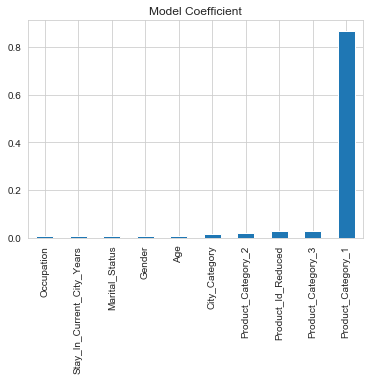

In [286]:
from xgboost.sklearn import XGBRegressor
#train_bkp = train.copy()
#test_bkp = test.copy()

#train.drop(['Age' ], axis=1 , inplace=True)
#test.drop(['Age'], axis=1 , inplace=True)
filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\Black Friday\\Algo5.csv'
predictors = [x for x in train.columns if x not in [target]+Id_Cols]

algo = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

ModelFit(algo , train , test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()


 Model Report
RMSE : 2909
CV Score : Mean - 0.809 | Std - 0.01026 | Min - 0.8021 | Max - 0.852


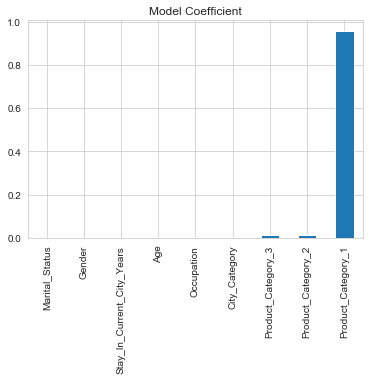

In [219]:
from sklearn.tree import DecisionTreeRegressor
train = train_bkp.copy()
test = test_bkp.copy()

train.drop(['Product_Id_Reduced'], axis=1 , inplace=True)
test.drop([ 'Product_Id_Reduced'], axis=1 , inplace=True)
filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\Black Friday\\Algo5.csv'
predictors = [x for x in train.columns if x not in [target]+Id_Cols]



algo = DecisionTreeRegressor(max_depth=25 , min_samples_leaf=200)

ModelFit(algo , train , test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()